In [93]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

# income_file = "irs_data/Income Data.csv"
# demo_file = "irs_data/Demographics.csv"

# income_df = pd.read_csv(income_file)
# demo_df = pd.read_csv(demo_file)




In [35]:
income_df.head()
demo_df.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,...,DP05_0087PE,DP05_0087PM,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM
0,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total po...,...,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P..."
1,8600000US35004,ZCTA5 35004,12045,725,12045,(X),5840,477,48.5,2.5,...,8933,(X),4203,353,47.1,2.3,4730,357,52.9,2.3
2,8600000US35005,ZCTA5 35005,7344,579,7344,(X),3397,309,46.3,2.7,...,5534,(X),2471,220,44.7,2.9,3063,342,55.3,2.9
3,8600000US35006,ZCTA5 35006,2883,361,2883,(X),1498,228,52,3,...,2296,(X),1151,173,50.1,3.3,1145,154,49.9,3.3
4,8600000US35007,ZCTA5 35007,26332,1027,26332,(X),12827,607,48.7,1.5,...,18205,(X),8810,537,48.4,1.7,9395,474,51.6,1.7


In [34]:
zip_df = income_df.loc[1:, ["NAME", "DP03_0062E"]]
zip_df["PostalCode"] = zip_df["NAME"].str.split(" ").str[-1]
zip_df.columns =["drop", "Median_Income", "PostalCode"]
zip_income = zip_df[["PostalCode", "Median_Income"]]
zip_income.head()


,PostalCode,Median_Income
1,35004,62902
2,35005,50473
3,35006,55909
4,35007,73587
5,35010,41954


In [1]:
demo_zip = demo_df.loc[1:, ["NAME", "DP05_0001E", "DP05_0009E", "DP05_0010E", "DP05_0018E"]]
demo_zip["PostalCode"] = demo_df["NAME"].str.split(" ").str[-1]
demo_zip.columns = ["NAME", "Population", "20to24", "25to34", "Median_age", "PostalCode" ]
demo_zip = demo_zip.loc[(demo_zip["Population"].astype(str).astype(int)>0)]
demo_zip["Keydemo_per"] = (demo_zip["20to24"].astype(str).astype(int) + demo_zip["25to34"].astype(str).astype(int)) / demo_zip["Population"].astype(str).astype(int)
demo_zip = demo_zip[["PostalCode", "Population", "Median_age", "Keydemo_per"]]


NameError: name 'demo_df' is not defined

In [61]:
zipcode_data = pd.merge(zip_income, demo_zip, on = "PostalCode")
zipcode_data.head()

,PostalCode,Median_Income,Population,Median_age,Keydemo_per
0,35004,62902,12045,35.5,0.221337
1,35005,50473,7344,44,0.136438
2,35006,55909,2883,47.2,0.117586
3,35007,73587,26332,37.7,0.170705
4,35010,41954,20613,42.6,0.176636


In [63]:
zipcode_data.to_csv("income_data.csv", index = False)

In [30]:
income_file = "income_clean.csv"
income_df = pd.read_csv(income_file)
income_df.dtypes

Unnamed: 0         int64
PostalCode         int64
Median_Income     object
Population         int64
Median_age        object
Keydemo_per      float64
dtype: object

In [31]:
income_df["Median_age"]= pd.to_numeric(income_df['Median_age'],errors='coerce')
income_df["Median_Income"]= pd.to_numeric(income_df['Median_Income'],errors='coerce')

In [32]:
income_df.dtypes

Unnamed: 0         int64
PostalCode         int64
Median_Income    float64
Population         int64
Median_age       float64
Keydemo_per      float64
dtype: object

In [25]:
income_df.to_csv("income_data.csv", index = False)

In [37]:
income_df= income_df.loc[:, ["PostalCode", "Median_Income", "Population", "Median_age", "Keydemo_per"]]
income_df.head()

,PostalCode,Median_Income,Population,Median_age,Keydemo_per
0,35004,62902.0,12045,35.5,0.221337
1,35005,50473.0,7344,44.0,0.136438
2,35006,55909.0,2883,47.2,0.117586
3,35007,73587.0,26332,37.7,0.170705
4,35010,41954.0,20613,42.6,0.176636


In [38]:
income_df.to_csv("income_data.csv", index = False)

In [1]:
income_df.head()

NameError: name 'income_df' is not defined

In [86]:
income_file = "income_data.csv"
income_df = pd.read_csv(income_file)
brewery_file = "../breweries_data/brewery_clean.csv"
brewery_df = pd.read_csv(brewery_file)

In [87]:
brewery_df = brewery_df.drop(columns=['Unnamed: 0'])
brewery_df.head()

,City,Latitude,Longitude,Name,PostalCode,State
0,Black Earth,43.138995,-89.747904,Shack The,53515,WI
1,Woodinville,47.734648,-122.149773,Redhook Ale Brewery Inc,98072,WA
2,Austin,30.225785,-97.952191,Thristy Planet,78736,Circleville
3,North Conway,44.068416,-71.143910,Moat Mountain Smoke House & Brewing Co.,3860,N Conway
4,Newport,41.514249,-71.315904,Coastal Extreme Brewing Company,2840,RI


In [88]:
brewery_count = brewery_df.groupby('PostalCode').agg({'Name': ['count']})
brewery_count.head()

,Name
,count
PostalCode,
716,1
840,1
1001,1
1002,1
1004,1


In [155]:
brewery_income = pd.merge(income_df, brewery_count, how = 'right', on = "PostalCode")
brewery_income.columns = ["PostalCode", "Median_Income", "Population", "Median_age", "Keydemo_per", "Brewery_count"]
brewery_income.head()

C:\Users\perki\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,PostalCode,Median_Income,Population,Median_age,Keydemo_per,Brewery_count
0,35007,73587.0,26332.0,37.7,0.170705,2
1,35016,46157.0,17208.0,41.0,0.178638,2
2,35040,62508.0,17311.0,33.7,0.205303,1
3,35055,46953.0,21153.0,38.6,0.192360,1
4,35080,88952.0,18471.0,36.7,0.163500,1


In [156]:
sorted_brewery = brewery_income.sort_values(by='Brewery_count', ascending = False)
sorted_brewery.reset_index(drop=True, inplace=True)
sorted_brewery.head()

,PostalCode,Median_Income,Population,Median_age,Keydemo_per,Brewery_count
0,93446,67766.0,44636.0,40.7,0.185568,42
1,94558,93052.0,68315.0,42.2,0.178438,41
2,99362,56665.0,41515.0,37.9,0.220884,38
3,94574,93587.0,8757.0,51.1,0.155647,32
4,80301,81527.0,25581.0,37.5,0.295219,30


In [157]:
starbucks_file = "../starbucks/starbucks_clean.csv"
starbucks_df = pd.read_csv(starbucks_file)
starbucks_df = starbucks_df.drop(columns=['Unnamed: 0'])
starbucks_df["PostalCode"]= starbucks_df["PostalCode"].fillna(0.0).astype(int)
sb_count = starbucks_df.groupby('PostalCode').agg({'PostalCode': ['count']})
sb_count.columns = ['Starbucks_count']
sb_sorted = sb_count.sort_values(by = 'Starbucks_count', ascending = False)
sb_sorted.head()

,Starbucks_count
PostalCode,
89109,32
98101,24
90045,21
10019,20
92101,20


In [158]:
combined_df = pd.merge(sorted_brewery, sb_sorted, how = 'left', on = "PostalCode")
combined_df["pop_per_brewery"] = combined_df["Population"]/ combined_df["Brewery_count"].apply(lambda x: x if x > 0 else 1)
combined_df["pop_per_starbucks"] = combined_df["Population"]/ combined_df["Starbucks_count"].apply(lambda x: x if x > 0 else 1)
combined_df['Brewery_rank'] = combined_df['pop_per_brewery'].rank(na_option='bottom', ascending = False)
combined_df['Income_rank'] = combined_df['Median_Income'].rank(na_option='bottom', ascending = False)
combined_df['Demo_rank'] = combined_df['Keydemo_per'].rank(na_option='bottom', ascending = False)
combined_df['Starbucks_rank'] = combined_df['pop_per_starbucks'].rank(na_option='bottom')
combined_df['combined_score'] = combined_df['Brewery_rank'] + combined_df['Income_rank'] + combined_df['Demo_rank'] + combined_df['Starbucks_rank']
combined_df['Total_rank'] = combined_df['combined_score'].rank(na_option='bottom')
ranked_df = combined_df.sort_values(by = 'Total_rank')

In [159]:
Top100_zip = ranked_df.head(100)
Top100_zip

,PostalCode,Median_Income,Population,Median_age,Keydemo_per,Brewery_count,Starbucks_count,pop_per_brewery,pop_per_starbucks,Brewery_rank,Income_rank,Demo_rank,Starbucks_rank,combined_score,Total_rank
3075,22202,114224.0,25409.0,35.0,0.393916,1,12.0,25409.000000,2117.416667,1139.0,353.0,205.0,344.0,2041.0,1.0
4836,10014,133501.0,30344.0,37.6,0.347284,1,5.0,30344.000000,6068.800000,817.0,156.0,347.0,1082.0,2402.0,2.0
1902,10016,126628.0,52886.0,32.7,0.457853,2,9.0,26443.000000,5876.222222,1069.5,210.0,110.0,1045.0,2434.5,3.0
2021,11201,129248.0,63378.0,34.9,0.309555,2,11.0,31689.000000,5761.636364,749.0,184.0,509.0,1017.0,2459.0,4.0
4315,95050,96872.0,38699.0,34.1,0.306468,1,9.0,38699.000000,4299.888889,482.0,759.0,527.0,708.0,2476.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,75204,81529.0,30537.0,30.9,0.526181,2,4.0,15268.500000,7634.250000,2022.0,1389.0,46.0,1437.0,4894.0,96.0
3071,22305,95610.0,18579.0,33.3,0.285268,1,2.0,18579.000000,9289.500000,1655.0,795.0,666.0,1809.0,4925.0,97.0
913,60606,140558.0,3287.0,36.3,0.436873,3,11.0,1095.666667,298.818182,4657.0,106.0,134.0,47.0,4944.0,98.0
2263,98208,91574.0,58162.0,36.8,0.215140,2,9.0,29081.000000,6462.444444,898.0,938.0,1932.0,1181.0,4949.0,99.0


In [161]:
Top100_zip.to_csv("Top100_zip.csv", index = False)

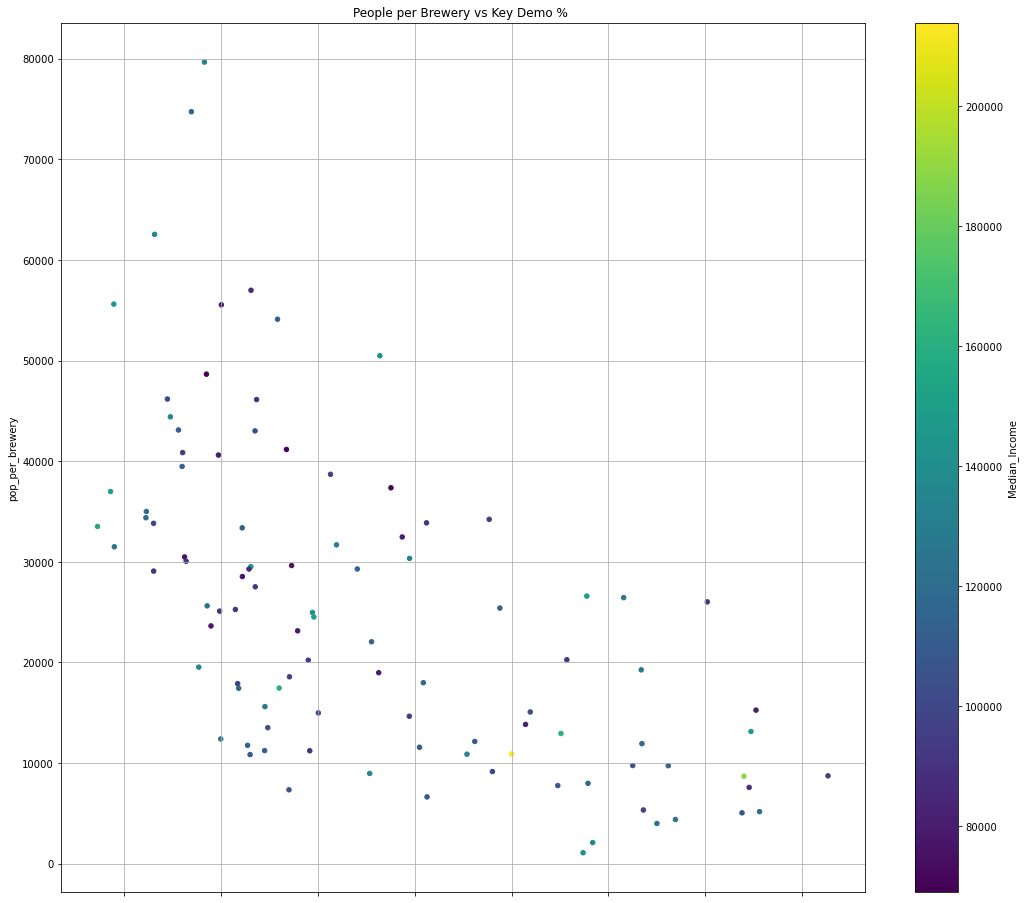

In [168]:
Top100_zip.plot(kind="scatter", x="Keydemo_per", y="pop_per_brewery", c ="Median_Income", colormap='viridis', grid=True, figsize=(18,16),
              title="People per Brewery vs Key Demo % ")

plt.savefig('Top100.png', bbox_inches='tight')
plt.show()
